In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, precision_score, f1_score, average_precision_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import collections
from collections import Counter

In [2]:
!pip install imblearn

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
print('No. of fraud cases:', round((df[df['Class'] == 1].shape[0]/df.shape[0])*100, 2), '%')
print('No. of non-fraud cases:', round((df[df['Class'] == 0].shape[0]/df.shape[0])*100, 2),'%')

No. of fraud cases: 0.17 %
No. of non-fraud cases: 99.83 %


D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

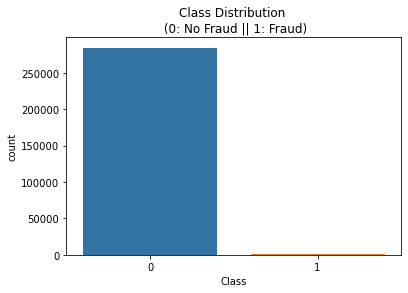

In [8]:
sns.countplot(df['Class'])
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)')

From the above observation, it seems that the data is very imbalanced. As most of the transactions are not fraud.

# Scaling the feature "Time" and "Amount"

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time'>

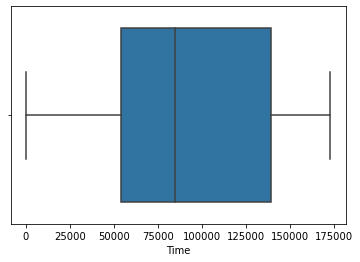

In [9]:
sns.boxplot(df['Time'])

D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


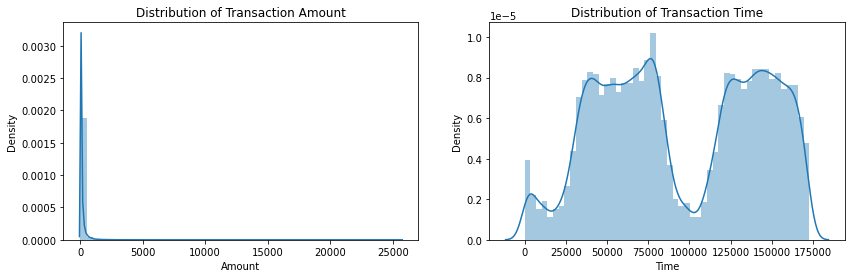

In [10]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(df['Amount'])
plt.title('Distribution of Transaction Amount')

plt.subplot(122)
sns.distplot(df['Time'])
plt.title('Distribution of Transaction Time')

plt.show()

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

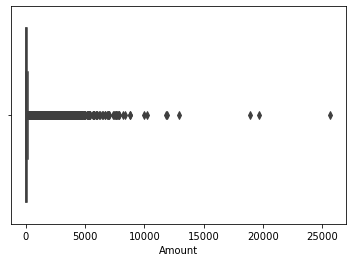

In [11]:
sns.boxplot(df['Amount'])

It can be observed from above box pot that most of the transaction amount is less than or equal to 10000 therefore, the remaining transaction amount would act as outlier for our dataset.

D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

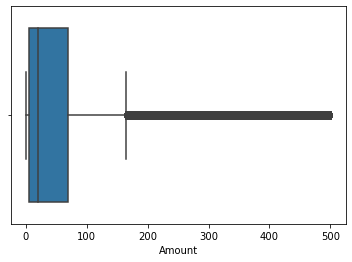

In [12]:
sns.boxplot(df[df['Amount']<=500]['Amount'])

In [13]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
rs1 = RobustScaler(copy = False)
rs2 = RobustScaler(copy = False)

In [15]:
rs1.fit_transform(df['Amount'].values.reshape(-1,1))

array([[ 1.78327395],
       [-0.26982463],
       [ 4.98372109],
       ...,
       [ 0.64109551],
       [-0.16767973],
       [ 2.72479564]])

In [16]:
rs2.fit_transform(df['Time'].values.reshape(-1,1))

array([[-0.99498349],
       [-0.99498349],
       [-0.99497175],
       ...,
       [ 1.03497457],
       [ 1.03497457],
       [ 1.03502156]])

In [17]:
rs1.scale_

array([71.565])

In [18]:
df.rename(columns={'Time':'scaled_time', 'Amount':'scaled_amount'}, inplace = True)

In [19]:
df.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


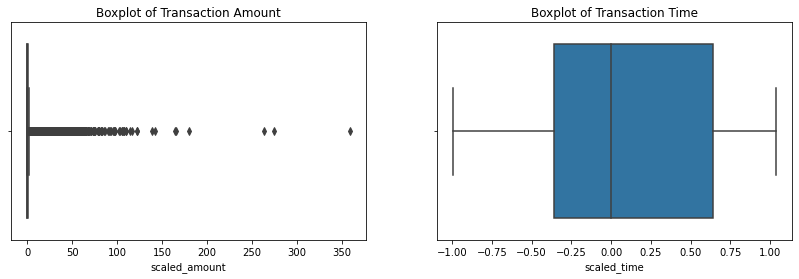

In [20]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.boxplot(df['scaled_amount'])
plt.title('Boxplot of Transaction Amount')

plt.subplot(122)
sns.boxplot(df['scaled_time'])
plt.title('Boxplot of Transaction Time')

plt.show()

In [21]:
df.sample(frac=1)

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
141523,-0.003736,1.162478,-0.323132,1.142739,0.254553,-1.080180,-0.335975,-0.510212,-0.042233,0.962822,...,-0.200180,-0.297622,0.037816,0.511550,0.181088,0.934369,-0.028313,0.022323,0.176902,0
104087,-0.185458,-1.138445,1.241035,0.903534,-1.266007,-0.791714,-1.211816,0.064942,0.477080,0.504105,...,-0.138843,-0.415166,0.061912,0.383336,-0.171000,0.738440,0.253617,0.121924,-0.287012,0
715,-0.988651,-1.054584,0.671513,2.106718,-0.591701,0.228368,-0.053748,0.941606,-0.191062,0.267565,...,-0.049688,0.137518,-0.420259,0.130488,0.482469,0.394143,-0.409756,-0.179564,0.190596,0
34226,-0.553601,1.264753,0.119746,-0.082937,0.397281,-0.077492,-0.299664,-0.167209,0.113286,0.139851,...,-0.313695,-1.045839,0.030589,-0.630899,0.231141,0.137025,-0.042126,0.008224,-0.223713,0
261621,0.885983,-7.234163,5.737921,-1.601616,-1.707583,-3.151085,2.339820,-6.723930,-16.157835,1.878117,...,17.299894,-4.441116,2.504477,0.745714,-0.047936,0.886617,0.405573,0.170358,0.235171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221296,0.679296,-1.527974,-0.486772,-0.698219,-0.665704,1.927465,1.427694,-0.222840,1.184190,-0.320311,...,0.662527,1.553269,0.039043,-1.031454,-0.664914,0.572290,0.324722,0.013813,0.656746,0
153359,0.164758,1.957094,0.831436,-0.610784,3.927898,0.562230,-0.459750,0.298067,-0.360377,0.036536,...,0.085905,0.550786,0.067711,-0.004693,0.128466,0.088782,-0.067378,-0.057049,-0.275554,0
232743,0.735382,-1.076028,0.472633,-0.416346,-1.221650,0.245856,1.223664,-0.621333,1.230523,-1.568286,...,0.036956,0.539214,-0.235961,-1.592622,-0.243148,0.873607,-0.214145,-0.039775,-0.293440,0
59685,-0.419812,-1.461473,1.713567,0.500557,1.186686,-0.589178,-1.331006,0.322875,0.561309,-1.031878,...,-0.158040,-0.735525,0.156958,0.878969,-0.551603,-0.773168,-0.076065,0.046133,0.004611,0


In [22]:
df[df['Class']==1].shape

(492, 31)

<h2>Splitting the Data (Original DataFrame i.e, df)</h2>


<b>Although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.</b> The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [23]:
X = df.drop(columns='Class')
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index,"Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distribution: \n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
Label Distribution: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


# Random Undersampling

In [24]:
df1 = pd.concat([df[df['Class']==0].sample(frac=1).iloc[:492], df[df['Class']==1]]).sample(frac=1, random_state=42) 

In [25]:
df1.shape

(984, 31)

# Equal Distributing and Correlating

No. of fraud cases: 50.0 %
No. of non-fraud cases: 50.0 %


D:\Anaconda3distribution\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


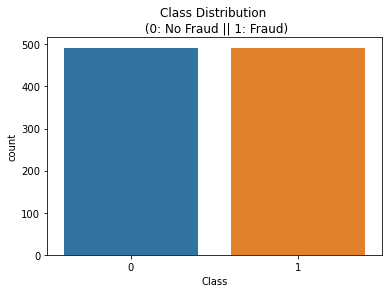

In [26]:
sns.countplot(df1['Class'])
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)')

print('No. of fraud cases:', round((df1[df1['Class'] == 1].shape[0]/df1.shape[0])*100, 2), '%')
print('No. of non-fraud cases:', round((df1[df1['Class'] == 0].shape[0]/df1.shape[0])*100, 2),'%')

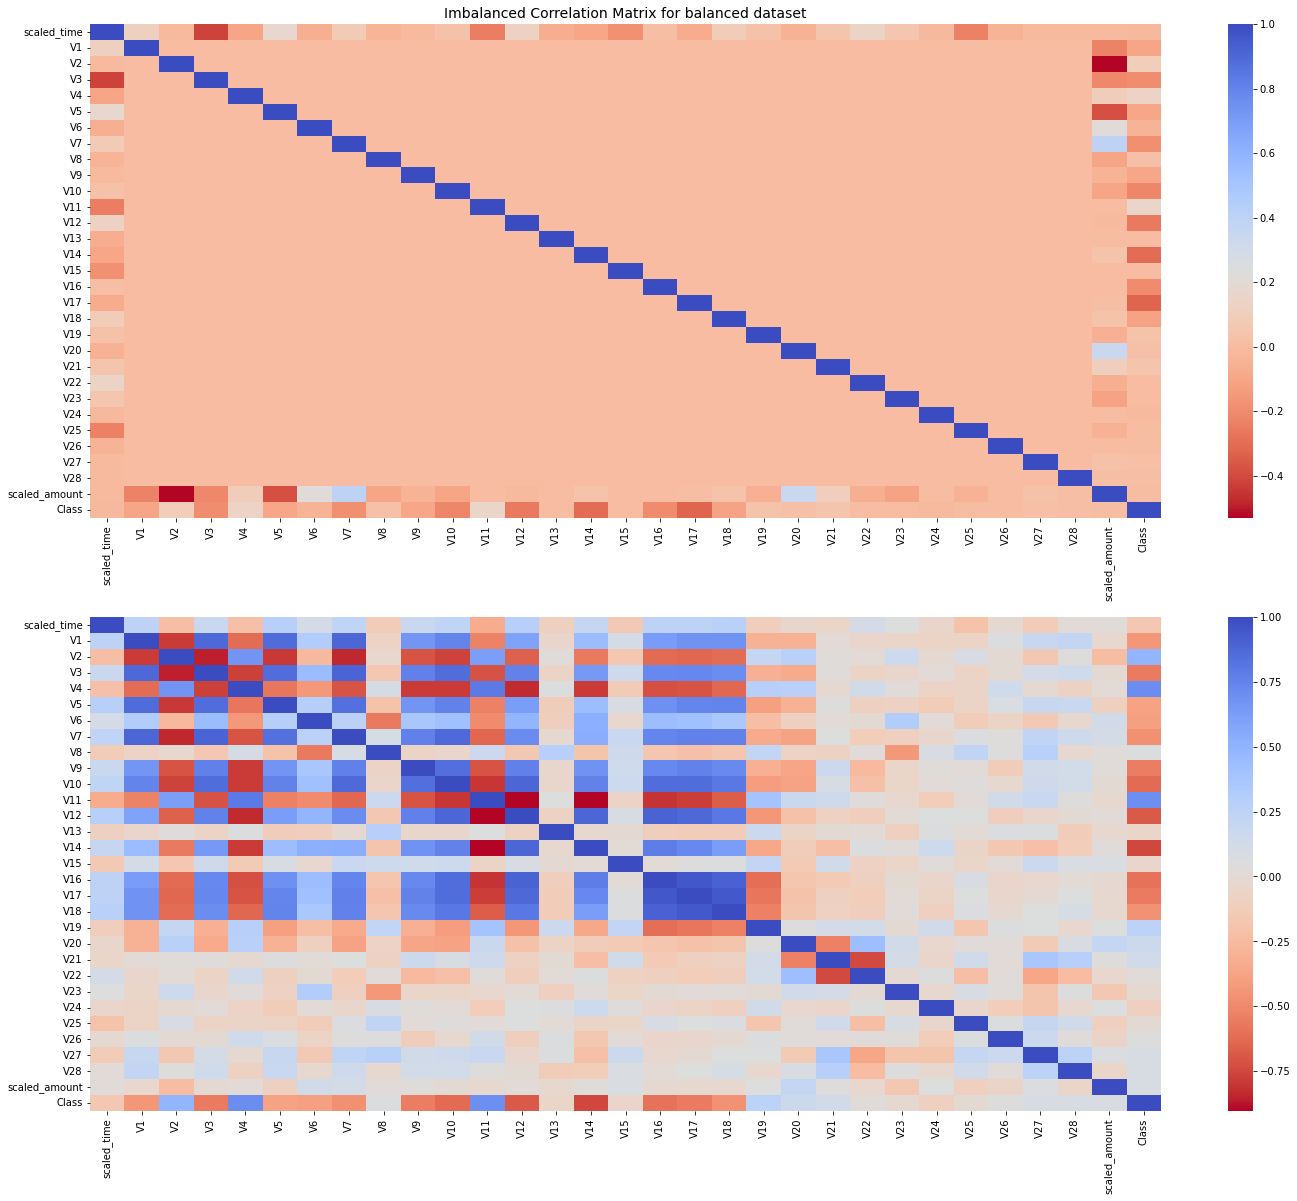

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix for original dataset", fontsize=14)

corr1 = df1.corr()
sns.heatmap(corr1, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax1.set_title("Imbalanced Correlation Matrix for balanced dataset", fontsize=14)

plt.show()

<ul>
    <li>V10, V12, V14, V16 - are negatively correlated</li>
    <li>V2, V4, V11, V19 - are positively correlated</li>
</ul>

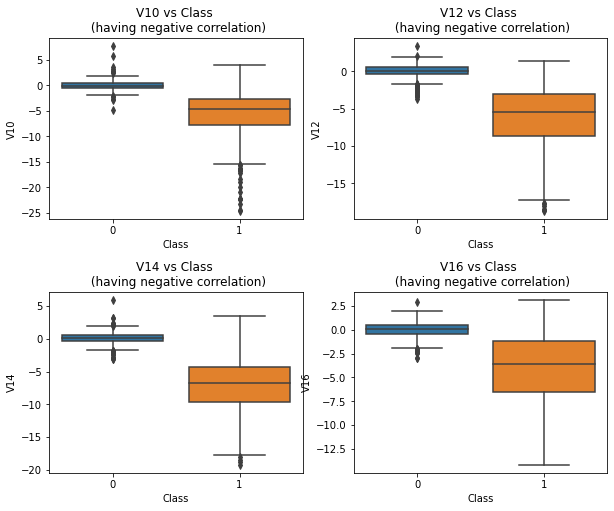

The lower is the value of these features, more likely is the fraud transaction


In [28]:
f, axes = plt.subplots(2,2,  figsize=(10,8))

plt.subplots_adjust(hspace = 0.4)

sns.boxplot(x="Class", y = "V10", data = df1, ax = axes[0][0])
axes[0][0].set_title("V10 vs Class \n (having negative correlation)")

sns.boxplot(x="Class", y = "V12", data = df1, ax = axes[0][1])
axes[0][1].set_title("V12 vs Class \n (having negative correlation)")

sns.boxplot(x="Class", y = "V14", data = df1, ax = axes[1][0])
axes[1][0].set_title("V14 vs Class \n (having negative correlation)")

sns.boxplot(x="Class", y = "V16", data = df1, ax = axes[1][1])
axes[1][1].set_title("V16 vs Class \n (having negative correlation)")

plt.show()

print("The lower is the value of these features, more likely is the fraud transaction")

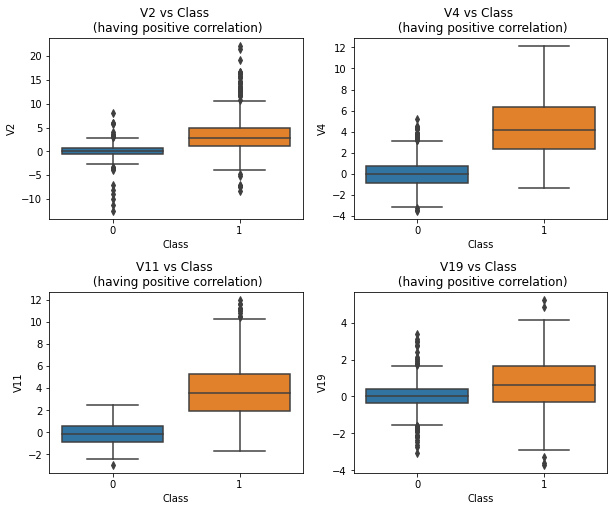

The higher is the value of these features, more likely is the non fraud transaction


In [29]:
f, axes = plt.subplots(2,2,  figsize=(10,8))

plt.subplots_adjust(hspace = 0.4)

sns.boxplot(x="Class", y = "V2", data = df1, ax = axes[0][0])
axes[0][0].set_title("V2 vs Class \n (having positive correlation)")

sns.boxplot(x="Class", y = "V4", data = df1, ax = axes[0][1])
axes[0][1].set_title("V4 vs Class \n (having positive correlation)")

sns.boxplot(x="Class", y = "V11", data = df1, ax = axes[1][0])
axes[1][0].set_title("V11 vs Class \n (having positive correlation)")

sns.boxplot(x="Class", y = "V19", data = df1, ax = axes[1][1])
axes[1][1].set_title("V19 vs Class \n (having positive correlation)")

plt.show()

print("The higher is the value of these features, more likely is the non fraud transaction")

D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3distribution\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

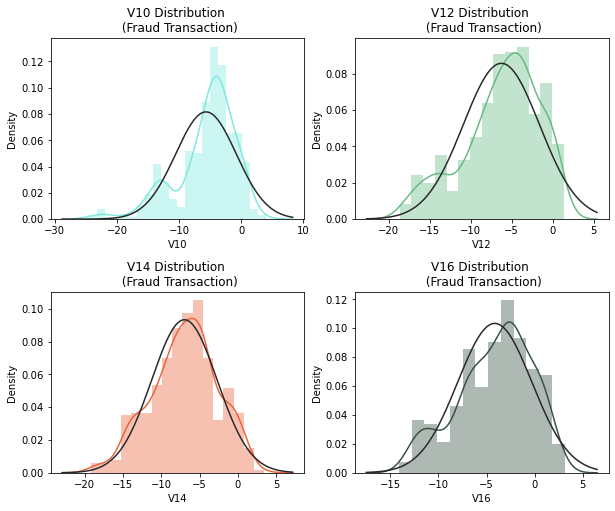

V14 is the only feature among V10, V12, V16 that has almost normal distribution


In [30]:
from scipy.stats import norm

f,([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,  figsize=(10,8))

plt.subplots_adjust(hspace=0.4)

sns.distplot(df1[df1['Class']==1]['V10'], fit=norm, ax = ax1, color='#7FE9DE')
ax1.set_title('V10 Distribution \n (Fraud Transaction)')

sns.distplot(df1[df1['Class']==1]['V12'], fit=norm, ax = ax2, color='#68B984')
ax2.set_title('V12 Distribution \n (Fraud Transaction)')

sns.distplot(df1[df1['Class']==1]['V14'], fit=norm, ax = ax3, color='#EB6440')
ax3.set_title('V14 Distribution \n (Fraud Transaction)')

sns.distplot(df1[df1['Class']==1]['V16'], fit=norm, ax = ax4, color='#395144')
ax4.set_title('V16 Distribution \n (Fraud Transaction)')

plt.show()
print('V14 is the only feature among V10, V12, V16 that has almost normal distribution')

In [31]:
def remove_outliers(fraud_data):
    q25,q75 = np.percentile(fraud_data, 25), np.percentile(fraud_data, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75-q25
    print('iqr: {}'.format(iqr))
    cut_off = 1.5*iqr
    print('Cut off: {}'.format(cut_off))
    lower_lim, upper_lim = q25-cut_off, q75+cut_off
    print('Lower: {}'.format(lower_lim))
    print('Upper: {}'.format(upper_lim))
    
    outliers = [x for x in fraud_data if x<lower_lim or x>upper_lim]
    return outliers

In [32]:
print('Removing outliers in feature V10\n')
outliers_10=remove_outliers(df1[df1['Class']==1]['V10'].values)
print('No. of outliers in feature V10: {}'.format(len(outliers_10)))
print('V10 outliers are: {}'.format(outliers_10))

df1 = df1[df1['V10'].apply(lambda x:False if x in outliers_10 else True)]

Removing outliers in feature V10

Quartile 25: -7.7566982278474725 | Quartile 75: -2.6141839131895623
iqr: 5.142514314657911
Cut off: 7.713771471986866
Lower: -15.47046969983434
Upper: 5.099587558797303
No. of outliers in feature V10: 19
V10 outliers are: [-16.6496281595399, -20.9491915543611, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -18.2711681738888, -16.6011969664137, -15.5637913387301, -23.2282548357516, -18.9132433348732, -16.2556117491401, -19.836148851696, -24.4031849699728, -15.5637913387301, -24.5882624372475, -17.1415136412892, -16.3035376590131, -16.7460441053944]


In [33]:
df1.shape

(965, 31)

In [34]:
print('Removing outliers in feature V12\n')
outliers_12=remove_outliers(df1[df1['Class']==1]['V12'].values)
print('No. of outliers in feature V12: {}'.format(len(outliers_12)))
print('V12 outliers are: {}'.format(outliers_12))

df1 = df1[df1['V12'].apply(lambda x:False if x in outliers_12 else True)]

Removing outliers in feature V12

Quartile 25: -8.46396612952571 | Quartile 75: -2.82494562476694
iqr: 5.63902050475877
Cut off: 8.458530757138156
Lower: -16.922496886663865
Upper: 5.633585132371216
No. of outliers in feature V12: 13
V12 outliers are: [-17.1829184301947, -17.003289445516, -17.1313009454468, -18.0475965708216, -17.2286622386187, -18.5536970096458, -18.4311310279993, -17.1829184301947, -18.6837146333443, -17.7691434633638, -17.1504052507291, -17.6316063138707, -17.003289445516]


In [35]:
df1.shape

(952, 31)

In [36]:
print('Removing outliers in feature V14\n')
outliers_14=remove_outliers(df1[df1['Class']==1]['V14'].values)
print('No. of outliers in feature V14: {}'.format(len(outliers_14)))
print('V14 outliers are: {}'.format(outliers_14))

df1 = df1[df1['V14'].apply(lambda x:False if x in outliers_14 else True)]

Removing outliers in feature V14

Quartile 25: -9.414161044857002 | Quartile 75: -4.288939281087107
iqr: 5.125221763769894
Cut off: 7.687832645654842
Lower: -17.101993690511843
Upper: 3.3988933645677344
No. of outliers in feature V14: 5
V14 outliers are: [3.44242199594215, -17.4759212828566, -17.230202160711, -17.7216383537133, -17.6206343516773]


In [37]:
df1.shape

(947, 31)

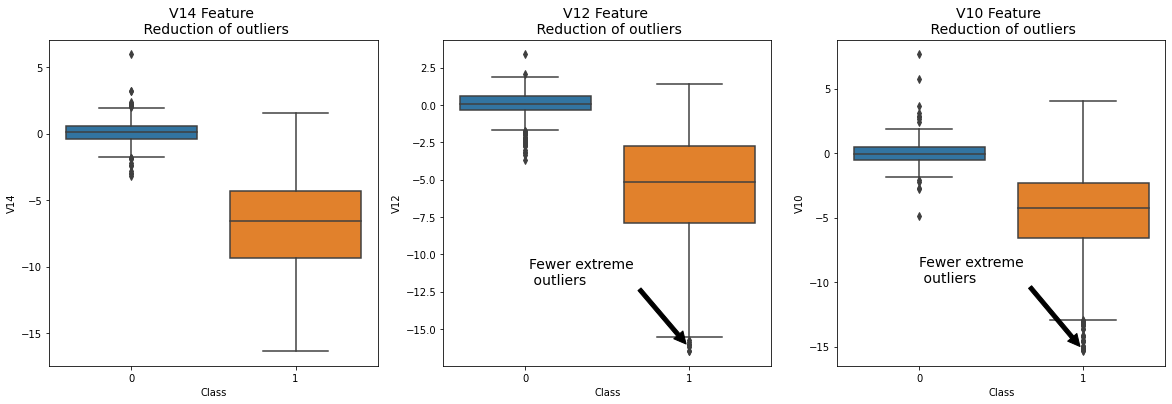

In [38]:
f, ([ax1, ax2, ax3]) = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(x = 'Class', y = 'V14', data=df1, ax=ax1)
ax1.set_title('V14 Feature \n Reduction of outliers', fontsize=14)

sns.boxplot(x = 'Class', y = 'V12', data=df1, ax=ax2)
ax2.set_title('V12 Feature \n Reduction of outliers', fontsize=14)
ax2.annotate("Fewer extreme \n outliers", xy=(0.98, -16.0), xytext=(0.02, -12.0), arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x = 'Class', y = 'V10', data=df1, ax=ax3)
ax3.set_title('V10 Feature \n Reduction of outliers', fontsize=14)
ax3.annotate("Fewer extreme \n outliers", xy=(0.98, -15.0), xytext=(0.0, -10.0), arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

# Classifiers Model on Random Undersampling Data

In [39]:
X = df1.drop('Class', axis=1)
y = df1['Class']

# t-SNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print('T-SNE took {:.2} s'.format(t1-t0))

# PCA implementation
t0=time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)
t1=time.time()
print('PCA took {:.2} s'.format(t1-t0))

# TruncatedSVD
t0=time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm = 'randomized' ,random_state=42).fit_transform(X)
t1=time.time()
print('Truncated SVD took {:.2} s'.format(t1-t0))

D:\Anaconda3distribution\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3distribution\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


T-SNE took 4.2 s
PCA took 0.044 s
Truncated SVD took 0.008 s


In [40]:
X.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
42756,-0.510568,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.307413
206944,0.608102,2.136071,0.126259,-2.432376,0.133705,0.589418,-1.958386,1.026297,-0.688609,0.181814,...,-0.271705,0.279947,0.995637,-0.205117,0.134274,0.736324,0.458511,-0.106706,-0.089957,-0.144065
111690,-0.145267,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,3.030811
159533,0.328011,1.862226,-0.050995,-1.701920,1.429781,0.397469,-0.914357,0.667681,-0.340680,0.224301,...,-0.152020,0.109709,0.304014,0.014194,1.082774,0.385452,-0.552502,-0.036955,-0.038705,0.908265
237653,0.759466,-1.538874,1.938769,-1.289902,-0.748175,-0.274495,-0.893620,-0.075625,1.210816,0.036569,...,-0.184410,-0.144143,-0.492212,0.169410,-0.675995,-0.629294,0.216508,0.223816,0.195294,-0.276392


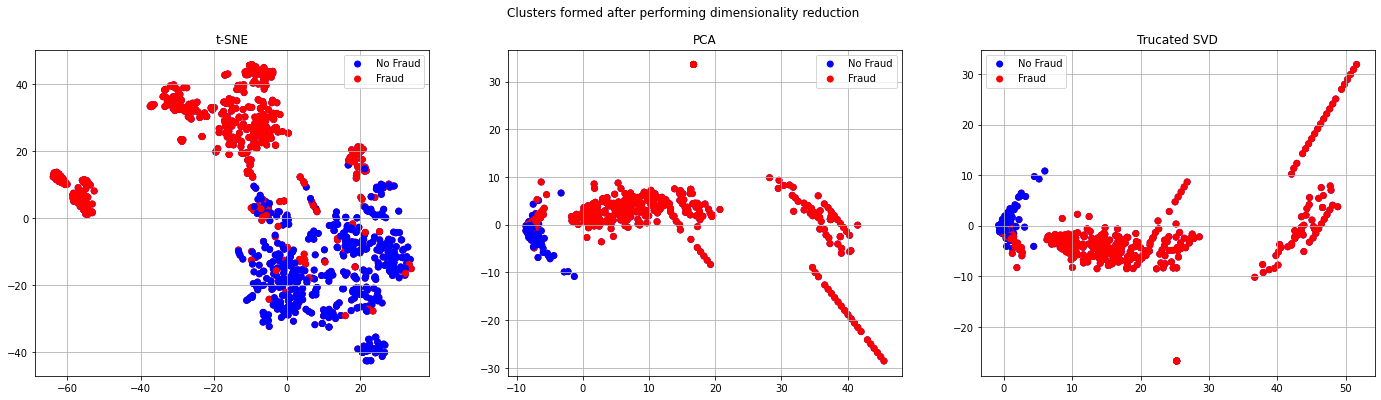

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

f.suptitle('Clusters formed after performing dimensionality reduction')

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:, 1], c=(y==0), label = 'No Fraud', cmap='bwr')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:, 1], c=(y==1), label = 'Fraud', cmap='bwr')
ax1.legend()
ax1.set_title('t-SNE')
ax1.grid(True)

ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), label = 'No Fraud', cmap='bwr')
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==1), label = 'Fraud', cmap='bwr')
ax2.legend()
ax2.set_title('PCA')
ax2.grid(True)


ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:, 1], c=(y==0), label = 'No Fraud', cmap='bwr')
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:, 1], c=(y==1), label = 'Fraud', cmap='bwr')
ax3.legend()
ax3.set_title('Trucated SVD')
ax3.grid(True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "KNearest": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5)
}

In [44]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = round(np.mean(cross_val_score(classifier, X_train, y_train, cv=5)),2)
    print('classifier:', classifier.__class__.__name__, 'has a accauracy score of ', 
          training_score*100,'% on the training dataset.')

classifier: LogisticRegression has a accauracy score of  94.0 % on the training dataset.
classifier: SVC has a accauracy score of  93.0 % on the training dataset.
classifier: KNeighborsClassifier has a accauracy score of  94.0 % on the training dataset.
classifier: DecisionTreeClassifier has a accauracy score of  93.0 % on the training dataset.


In [45]:
# Logistic Regression
logReg_params = {"penalty":['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logReg = GridSearchCV(LogisticRegression(), logReg_params, cv=5)
grid_logReg.fit(X_train, y_train)
print("Best parameters in logistic Regression is: ", grid_logReg.best_params_)
logReg = grid_logReg.best_estimator_
print("Best score of logistic Regression is : ", round(grid_logReg.best_score_, 2)*100,"%")

# K Nearest Neighbor
K_params = {"n_neighbors":[2,3,4], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), K_params, cv=5)
grid_knears.fit(X_train, y_train)
print("Best parameters in K nearest neighbor is: ", grid_knears.best_params_)
knn = grid_knears.best_estimator_
print("Best score of K nearest neighbor is : ", round(grid_knears.best_score_, 2)*100, "%")

# Support Vector Classifier
svc_params = {'C':[0.1, 0.5, 0.8, 1, 4], 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters in support vector classifier is: ", grid_svc.best_params_)
svc = grid_svc.best_estimator_
print("Best score of support vector classifier is : ", round(grid_svc.best_score_, 2)*100, "%")

# Decision Tree Classifier
dc_params = {'criterion':['gini', 'entropy'], 'max_depth':[None, 1, 2, 3, 5], 'min_samples_split':[0.25, 0.5, 0.6, 0.75]}
grid_dc = GridSearchCV(DecisionTreeClassifier(), dc_params, cv=5)
grid_dc.fit(X_train, y_train)
print("Best parameters in decision tree classifier is: ", grid_dc.best_params_)
dc = grid_dc.best_estimator_
print("Best score of decision tree classifier is : ", round(grid_dc.best_score_, 2)*100, "%")


D:\Anaconda3distribution\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3distribution\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Anaconda3distribution\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.91808121        nan 0.9405542         nan 0.94718543
        nan 0.94322935        nan 0.94587835        nan 0.94323806
        nan 0.94455385]
  warnings.warn(


Best parameters in logistic Regression is:  {'C': 0.1, 'penalty': 'l2'}
Best score of logistic Regression is :  95.0 %
Best parameters in K nearest neighbor is:  {'algorithm': 'auto', 'n_neighbors': 3}
Best score of K nearest neighbor is :  94.0 %
Best parameters in support vector classifier is:  {'C': 1, 'kernel': 'linear'}
Best score of support vector classifier is :  95.0 %
Best parameters in decision tree classifier is:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 0.25}
Best score of decision tree classifier is :  93.0 %


In [46]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=2, min_samples_split=0.5)
rfc.fit(X_train, y_train)
rfc.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(max_depth=2, min_samples_split=0.5, n_estimators=1000)>

In [47]:
undersample_X = df.drop(columns='Class')
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index,"Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = make_pipeline(NearMiss(sampling_strategy = 'majority'), logReg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [48]:
logReg_pred = cross_val_predict(logReg, X_train, y_train, cv=5, method='decision_function')
print('Logistic Regression : ', roc_auc_score(y_train, logReg_pred))

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')
print('Support Vector Classifier : ', roc_auc_score(y_train, svc_pred))

knn_pred = cross_val_predict(knn, X_train, y_train, cv=5)
print('K Nearest Neighbors : ',  roc_auc_score(y_train, knn_pred))

dc_pred = cross_val_predict(dc, X_train, y_train, cv=5)
print('Decision Tree Classifier : ', roc_auc_score(y_train, dc_pred))

Logistic Regression :  0.9878592908595006
Support Vector Classifier :  0.9845373802363802
K Nearest Neighbors :  0.938194978669837
Decision Tree Classifier :  0.9259913280648997


In [49]:
roc_curve(y_train, logReg_pred)[2].shape

(68,)

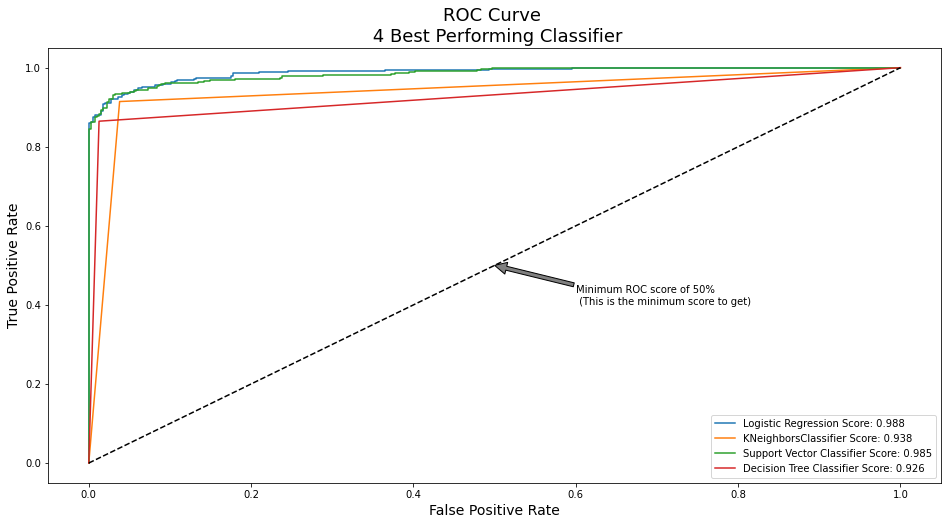

In [50]:
# fpr - false positive rate
# tpr - true positive rate
# threshold  - decision threshold

log_fpr, log_tpr, log_threshold = roc_curve(y_train, logReg_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train, knn_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
dc_fpr, dc_tpr, dc_threshold = roc_curve(y_train, dc_pred)


plt.figure(figsize=(16,8))
plt.title('ROC Curve \n 4 Best Performing Classifier', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Score: {:.3f}'.format(roc_auc_score(y_train, logReg_pred)))
plt.plot(knn_fpr, knn_tpr, label='KNeighborsClassifier Score: {:.3f}'.format(roc_auc_score(y_train, knn_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.3f}'.format(roc_auc_score(y_train, svc_pred)))
plt.plot(dc_fpr,dc_tpr, label='Decision Tree Classifier Score: {:.3f}'.format(roc_auc_score(y_train, dc_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.4), arrowprops=dict(facecolor='grey'))
plt.legend()
plt.show()

In [51]:
log_fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00253165,
       0.00253165, 0.00506329, 0.00506329, 0.00759494, 0.00759494,
       0.01518987, 0.01518987, 0.01772152, 0.01772152, 0.02025316,
       0.02025316, 0.0278481 , 0.0278481 , 0.03544304, 0.03544304,
       0.04050633, 0.04050633, 0.04303797, 0.04303797, 0.04810127,
       0.04810127, 0.05063291, 0.05063291, 0.0556962 , 0.0556962 ,
       0.06075949, 0.06075949, 0.06582278, 0.06582278, 0.08101266,
       0.08101266, 0.09113924, 0.09113924, 0.10126582, 0.10126582,
       0.10632911, 0.10632911, 0.10886076, 0.10886076, 0.12911392,
       0.12911392, 0.13164557, 0.13164557, 0.17468354, 0.17468354,
       0.17721519, 0.17721519, 0.21012658, 0.21012658, 0.24556962,
       0.24556962, 0.36455696, 0.36455696, 0.49367089, 0.49367089,
       0.59493671, 0.59493671, 1.        ])

In [52]:
print("Model is Overfitting Over the Random Sampled Data")
print("---"*84)
log_report = classification_report(y_train, logReg.predict(X_train))
print(log_report)

Model is Overfitting Over the Random Sampled Data
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       395
           1       0.80      0.95      0.87       362

    accuracy                           0.87       757
   macro avg       0.87      0.87      0.87       757
weighted avg       0.88      0.87      0.86       757



D:\Anaconda3distribution\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
print("Performance of Model Over Original Data")
print("---"*84)
print("Accuracy score: ", np.mean(undersample_accuracy))
print("Precision score: ", np.mean(undersample_precision))
print("Recall score: ", np.mean(undersample_recall))
print("F1 score: ", np.mean(undersample_f1))

Performance of Model Over Original Data
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score:  0.7584995379877927
Precision score:  0.00726691320965416
Recall score:  0.00726691320965416
F1 score:  0.01440495218529147


In [54]:
undersample_yscore = logReg.decision_function(original_Xtest)
undersample_yscore

array([ 0.52891524, 13.78110999,  4.70346974, ..., -3.14503383,
       -1.5953886 , -0.05412777])

In [55]:
undersample_average_precision = average_precision_score(original_ytest, undersample_yscore)
print('Average precision recall score: {:.2f}'.format(undersample_average_precision))

Average precision recall score: 0.02


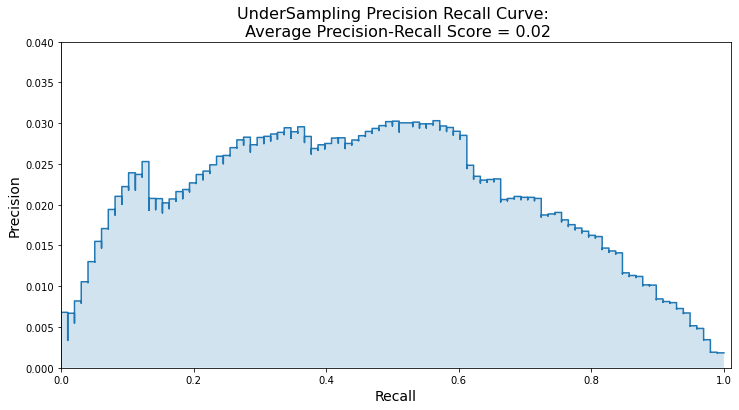

In [56]:
plt.figure(figsize=(12, 6))
precision, recall, _ = precision_recall_curve(original_ytest, undersample_yscore)

plt.step(recall, precision, alpha=1, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xlim([0, 1.01])
plt.ylim([0, 0.04])
plt.title('UnderSampling Precision Recall Curve: \n Average Precision-Recall Score = {:.2f}'.format(undersample_average_precision), fontsize=16)
plt.show()

# Performing Oversampling using SMOTE

In [57]:
print('Length of X(train): {} | Length of y(train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X(test): {} | Length of y(test): {}'.format(len(original_Xtest), len(original_ytest)))
print('---'*84)

accuracy_smt = []
precision_smt = []
recall_smt = []
f1_smt = []
auc_smt = []

rand_logReg_params = logReg_params

# sss = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
# rand_logReg = GridSearchCV(LogisticRegression(), rand_logReg_params, cv=4)

for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    oversample_pipeline = make_pipeline(SMOTE(sampling_strategy='not majority'), logReg)
    oversample_model = oversample_pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])
#     best_clfyr =  rand_logReg.best_estimator_
    oversample_prediction = oversample_model.predict(original_Xtrain[test_idx])
    
    accuracy_smt.append(oversample_pipeline.score(original_Xtrain[test_idx], original_ytrain[test_idx]))
    precision_smt.append(precision_score(original_ytrain[test_idx], oversample_prediction))
    recall_smt.append(recall_score(original_ytrain[test_idx], oversample_prediction))
    f1_smt.append(f1_score(original_ytrain[test_idx], oversample_prediction))
    auc_smt.append(roc_auc_score(original_ytrain[test_idx], oversample_prediction))

print("Training Performance of Model Over Original Data Using SMOTE During Cross Validation")
print("---"*42)
print("Accuracy score: ", np.mean(accuracy_smt))
print("Precision score: ", np.mean(precision_smt))
print("Recall score: ", np.mean(recall_smt))
print("F1 score: ", np.mean(f1_smt))

Length of X(train): 227846 | Length of y(train): 227846
Length of X(test): 56961 | Length of y(test): 56961
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


D:\Anaconda3distribution\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Performance of Model Over Original Data Using SMOTE During Cross Validation
------------------------------------------------------------------------------------------------------------------------------
Accuracy score:  0.9427865697767492
Precision score:  0.06146687528688351
Recall score:  0.9137293086660175
F1 score:  0.1133401364837106


In [58]:
smt_prediction = oversample_model.predict(original_Xtest)
print(classification_report(original_ytest, smt_prediction, target_names=['No Fraud', 'Fraud']))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [59]:
smt_y_score = oversample_model.decision_function(original_Xtest)

In [60]:
smt_average_precision = average_precision_score(original_ytest, smt_y_score)
print('Average precision recall score: {:.2f}'.format(smt_average_precision))

Average precision recall score: 0.75


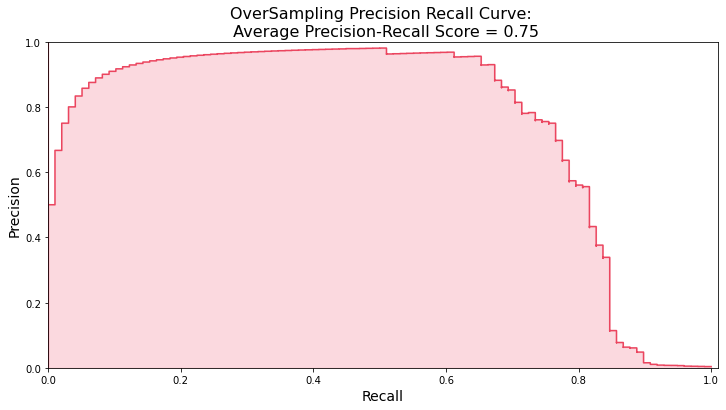

In [61]:
plt.figure(figsize=(12, 6))
precision, recall, _ = precision_recall_curve(original_ytest, smt_y_score)

plt.step(recall, precision, alpha=1, where='post', color='#EB455F')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#EB455F')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xlim([0, 1.01])
plt.ylim([0, 1.0])
plt.title('OverSampling Precision Recall Curve: \n Average Precision-Recall Score = {:.2f}'.format(smt_average_precision), fontsize=16)
plt.show()

In [62]:
sm = SMOTE(sampling_strategy='not majority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [63]:
print(Xsm_train.shape)
original_ytrain[original_ytrain==0].shape

(454904, 30)


(227452,)

In [64]:
t0 = time.time()
logReg_sm = grid_logReg.best_estimator_
logReg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Time taken to fit oversample data: {} sec".format(t1-t0))

Time taken to fit oversample data: 11.107131481170654 sec


D:\Anaconda3distribution\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Testing With Logistic Regression

<h2> Confusion Matrix:</h2>

D:\Anaconda3distribution\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


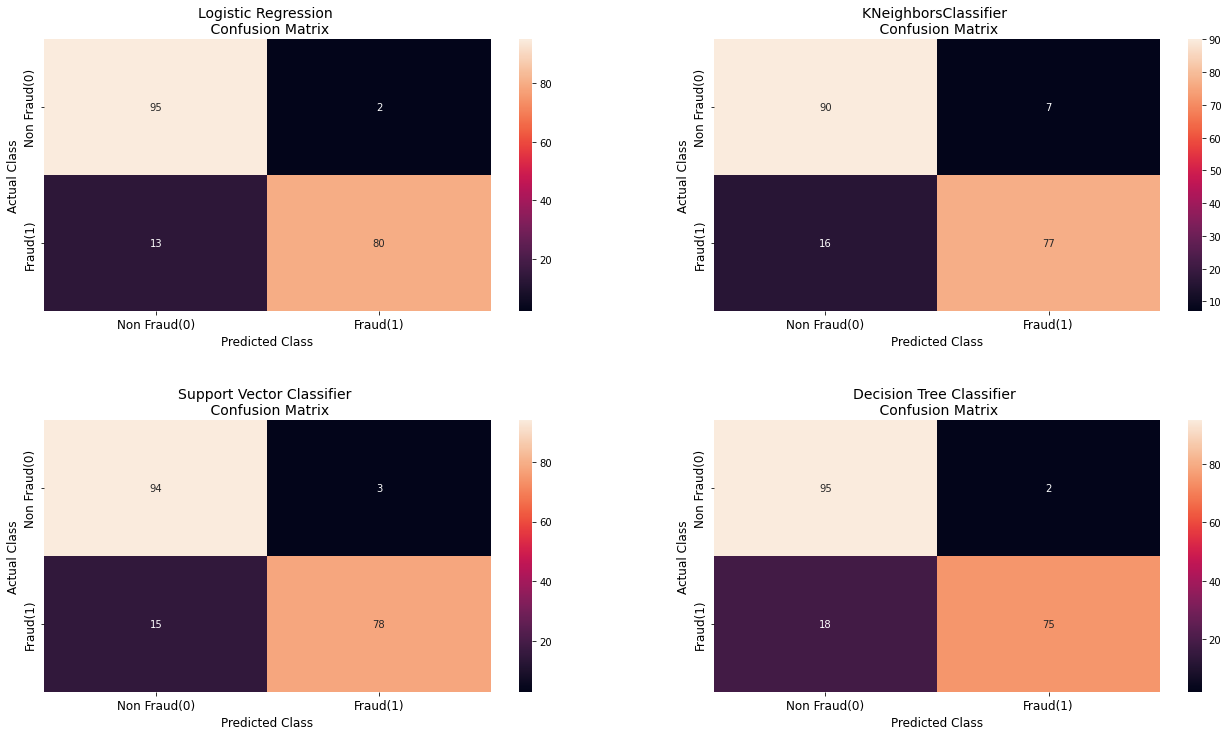

In [65]:
logReg_y_pred = logReg_sm.predict(X_test)
knn_y_pred = knn.predict(X_test)
svc_y_pred = svc.predict(X_test)
dc_y_pred = dc.predict(X_test)

logReg_cf = confusion_matrix(y_test, logReg_y_pred)
knn_cf = confusion_matrix(y_test, knn_y_pred)
svc_cf = confusion_matrix(y_test, svc_y_pred)
dc_cf = confusion_matrix(y_test, dc_y_pred)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(22, 12))

plt.subplots_adjust(hspace=0.4)

sns.heatmap(logReg_cf, ax=ax1, annot=True)
ax1.set_title('Logistic Regression \n Confusion Matrix', fontsize=14)
ax1.set_xlabel('Predicted Class', fontsize=12)
ax1.set_xticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)
ax1.set_ylabel('Actual Class', fontsize=12)
ax1.set_yticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)


sns.heatmap(knn_cf, ax=ax2, annot=True)
ax2.set_title('KNeighborsClassifier \n Confusion Matrix', fontsize=14)
ax2.set_xlabel('Predicted Class', fontsize=12)
ax2.set_xticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)
ax2.set_ylabel('Actual Class', fontsize=12)
ax2.set_yticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)


sns.heatmap(svc_cf, ax=ax3, annot=True)
ax3.set_title('Support Vector Classifier \n Confusion Matrix', fontsize=14)
ax3.set_xlabel('Predicted Class', fontsize=12)
ax3.set_xticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)
ax3.set_ylabel('Actual Class', fontsize=12)
ax3.set_yticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)


sns.heatmap(dc_cf, ax=ax4, annot=True)
ax4.set_title('Decision Tree Classifier \n Confusion Matrix', fontsize=14)
ax4.set_xlabel('Predicted Class', fontsize=12)
ax4.set_xticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)
ax4.set_ylabel('Actual Class', fontsize=12)
ax4.set_yticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)

plt.show()

<b>Logistic Regression</b><br>
TP = 80 1 - 1 <br>
FN = 13 1 - 0 <br>
TN = 96 0 - 0 <br>
FP = 1  0 - 1 <br>

In [66]:
pd.DataFrame(logReg_y_pred[y_test==1]==1).value_counts()

True     80
False    13
dtype: int64

In [67]:
pd.DataFrame(logReg_y_pred[y_test==0]==0).value_counts()

True     95
False     2
dtype: int64

In [68]:
print('Logistic Regression:\n'+ '---'*42+'\n', classification_report(y_test, logReg_y_pred), '--'*63)

print('\nSupport Vector Classifier:\n'+ '---'*42+'\n', classification_report(y_test, svc_y_pred), '--'*63)

print('\nKNeighborsClassifier:\n'+ '---'*42+'\n', classification_report(y_test, knn_y_pred), '--'*63)

print('\nDecision Tree Classifier:\n'+ '---'*42+'\n', classification_report(y_test, dc_y_pred), '--'*63)

Logistic Regression:
------------------------------------------------------------------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        97
           1       0.98      0.86      0.91        93

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190
 ------------------------------------------------------------------------------------------------------------------------------

Support Vector Classifier:
------------------------------------------------------------------------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        97
           1       0.96      0.84      0.90        93

    accuracy                           0.91       190
   macro avg       0.91

In [69]:
y_pred = logReg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

y_pred_smote = oversample_model.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_smote)

d = {'Technique':['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score':[undersample_score, oversample_score]}

result  = pd.DataFrame(d)

result

D:\Anaconda3distribution\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Technique,Score
0,Random UnderSampling,0.921053
1,Oversampling (SMOTE),0.988343


# Testing Neural Network Over Random UnderSampling Data and Oversampling Data

In [70]:
import tensorflow
from tensorflow import keras
from keras import backend as K
from keras import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [71]:
!pip install tensorflow

# Trained with Random UnderSampling Data

In [72]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([Dense(n_inputs, input_shape=(n_inputs, ), activation = 'relu'),
                               Dense(32, activation = 'relu'),
                               Dense(2, activation = 'softmax')
                               ])

In [73]:
X_train.shape

(757, 30)

In [74]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [75]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 3s - loss: 0.8073 - accuracy: 0.5157 - val_loss: 0.5037 - val_accuracy: 0.6513 - 3s/epoch - 100ms/step
Epoch 2/20
25/25 - 0s - loss: 0.4041 - accuracy: 0.8132 - val_loss: 0.3888 - val_accuracy: 0.8421 - 153ms/epoch - 6ms/step
Epoch 3/20
25/25 - 0s - loss: 0.3027 - accuracy: 0.9207 - val_loss: 0.3192 - val_accuracy: 0.9145 - 160ms/epoch - 6ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2426 - accuracy: 0.9306 - val_loss: 0.2675 - val_accuracy: 0.9211 - 172ms/epoch - 7ms/step
Epoch 5/20
25/25 - 0s - loss: 0.2025 - accuracy: 0.9421 - val_loss: 0.2313 - val_accuracy: 0.9342 - 174ms/epoch - 7ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1745 - accuracy: 0.9471 - val_loss: 0.2061 - val_accuracy: 0.9342 - 172ms/epoch - 7ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1571 - accuracy: 0.9504 - val_loss: 0.1897 - val_accuracy: 0.9408 - 130ms/epoch - 5ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1406 - accuracy: 0.9521 - val_loss: 0.1770 - val_accuracy: 0.9408 - 139ms/epoch - 6ms/step
Epoch 9/20
25/25 

In [77]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_predictions

array([[8.8882800e-05, 9.9991107e-01],
       [2.1939054e-06, 9.9999785e-01],
       [1.1704081e-01, 8.8295913e-01],
       ...,
       [9.9556667e-01, 4.4333632e-03],
       [9.9289107e-01, 7.1089580e-03],
       [9.3083596e-01, 6.9164060e-02]], dtype=float32)

In [78]:
undersample_fraud_predictions = undersample_predictions.argmax(axis=1)
undersample_fraud_predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

[[54973  1890]
 [    9    89]]


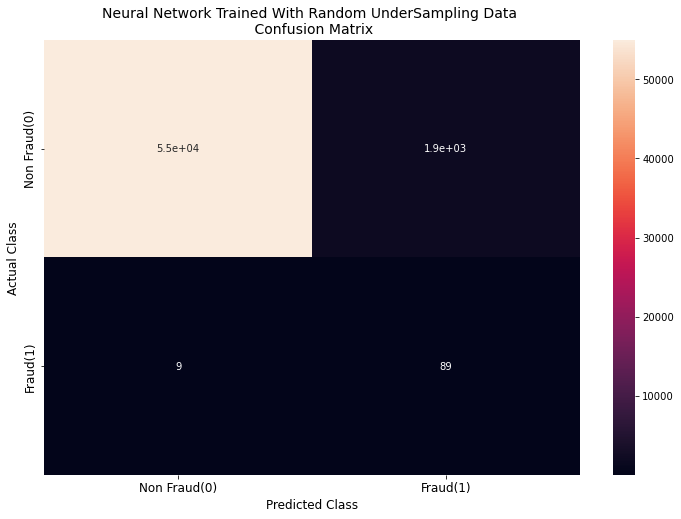

In [79]:
undersample_ntw = confusion_matrix(original_ytest, undersample_fraud_predictions)

print(undersample_ntw)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(undersample_ntw, ax=ax, annot=True)
ax.set_title('Neural Network Trained With Random UnderSampling Data \n Confusion Matrix', fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_xticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
ax.set_yticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)

plt.show()

# Trained with OverSampling Data (SMOTE)

In [80]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([Dense(n_inputs, input_shape=(n_inputs, ), activation = 'relu'),
                               Dense(32, activation = 'relu'),
                               Dense(2, activation = 'softmax')
                               ])

In [81]:
oversample_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 6s - loss: 0.0709 - accuracy: 0.9722 - val_loss: 0.0257 - val_accuracy: 0.9939 - 6s/epoch - 5ms/step
Epoch 2/20
1214/1214 - 5s - loss: 0.0124 - accuracy: 0.9972 - val_loss: 0.0076 - val_accuracy: 0.9999 - 5s/epoch - 4ms/step
Epoch 3/20
1214/1214 - 4s - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.0032 - val_accuracy: 1.0000 - 4s/epoch - 4ms/step
Epoch 4/20
1214/1214 - 5s - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0017 - val_accuracy: 1.0000 - 5s/epoch - 5ms/step
Epoch 5/20
1214/1214 - 6s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0067 - val_accuracy: 0.9993 - 6s/epoch - 5ms/step
Epoch 6/20
1214/1214 - 5s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 1.0000 - 5s/epoch - 4ms/step
Epoch 7/20
1214/1214 - 5s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0014 - val_accuracy: 1.0000 - 5s/epoch - 4ms/step
Epoch 8/20
1214/1214 - 4s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 6.8810e-04 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoc

In [83]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_predictions

array([[9.99995708e-01, 4.26006272e-06],
       [9.05942321e-01, 9.40577388e-02],
       [1.00000000e+00, 1.12163886e-32],
       ...,
       [1.00000000e+00, 4.26279986e-34],
       [1.00000000e+00, 1.80894151e-32],
       [1.00000000e+00, 1.76229930e-16]], dtype=float32)

In [84]:
oversample_fraud_predictions = oversample_predictions.argmax(axis=1)
oversample_fraud_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[[56849    14]
 [   31    67]]


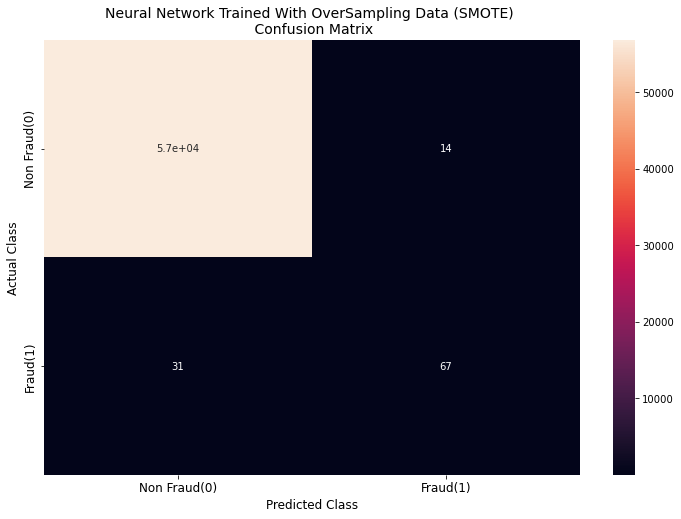

In [85]:
oversample_ntw = confusion_matrix(original_ytest, oversample_fraud_predictions)

print(oversample_ntw)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(oversample_ntw, ax=ax, annot=True)
ax.set_title('Neural Network Trained With OverSampling Data (SMOTE) \n Confusion Matrix', fontsize=14)
ax.set_xlabel('Predicted Class', fontsize=12)
ax.set_xticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)
ax.set_ylabel('Actual Class', fontsize=12)
ax.set_yticklabels(['Non Fraud(0)',  'Fraud(1)'], fontsize=12)

plt.show()